In [1]:
import wisps
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
binar=pd.read_pickle(wisps.OUTPUT_FILES+'/binary_templates.pkl.gz').dropna()

In [3]:
len(binar)

15753

In [4]:
primary_spts=np.vstack(binar.primary.apply(lambda x: [x[0][0], x[1][0]]))

In [5]:
system_spts=binar.system.apply(wisps.make_spt_number).values

In [6]:
df=pd.DataFrame()
df['prim']=primary_spts[:,0]
df['sec']=primary_spts[:,1]
df['sys']=np.vstack(system_spts)[:,0]

In [7]:
import seaborn as sns

In [8]:
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

In [9]:
#h=plt.hist2d(primary_spts[:,0], primary_spts[:,1], cmap='viridis')
#cb=plt.colorbar()

In [10]:
df=(df[(df.prim<=df.sec) &( df.sys >15.)]).reset_index(drop=True).applymap(float)

In [11]:
#df['diff']=df.prim-df.sec

In [12]:
#df=(df[df.new_prim>=df.new_sec]).reset_index(drop=True).applymap(float)

In [13]:
df['diffr']=df['prim']-df['sec']

In [14]:
kdspt=wisps.kernel_density(df['diffr'].values)

In [15]:
acc=pd.DataFrame()

In [16]:
acc['sys_number']=df.groupby('sys').apply(lambda x: len(x.sys))

In [17]:
acc['prim_number']=df.groupby('prim').apply(lambda x: len(x.prim))

In [18]:
acc['ratio']=acc.sys_number/acc.prim_number

In [19]:
acc['sys_difference']=df.groupby('sys').apply(lambda x: np.nanmean(x.sys-x.prim))

In [20]:
acc['sys_difference_std']=df.groupby('sys').apply(lambda x: np.nanstd(x.sys-x.prim))

In [35]:
cmap=sns.diverging_palette(1000, 30, n=100, as_cmap=True, center="dark")

#MIX MY COLORMAP WITH COOOLWARM 
colors1 =cmap(np.linspace(0., 1, 256))
colors2=plt.cm.cubehelix(np.linspace(0., 1, 256))
colors3=plt.cm.coolwarm(np.linspace(0., 1, 256))


colors = np.vstack((colors1+colors2+colors2)/3)
import matplotlib.colors as mcolors
mymap=mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

In [30]:
import matplotlib

In [40]:
np.linspace(df.sys.min(), df.sys.max(), 6+8)

array([16.        , 17.92307692, 19.84615385, 21.76923077, 23.69230769,
       25.61538462, 27.53846154, 29.46153846, 31.38461538, 33.30769231,
       35.23076923, 37.15384615, 39.07692308, 41.        ])

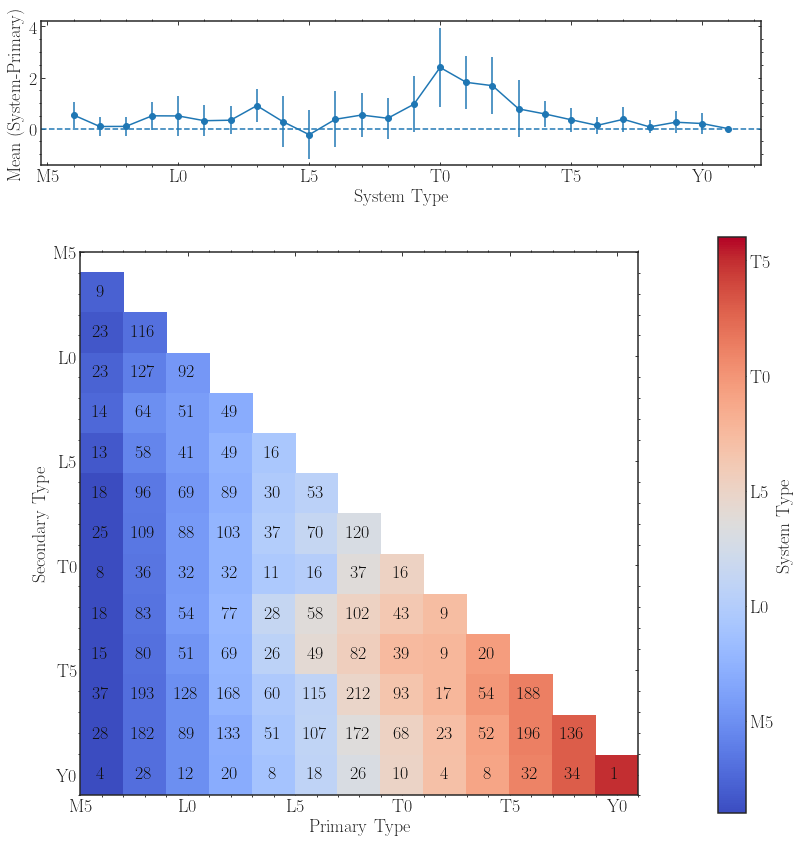

In [53]:
fig, ax=plt.subplots(figsize=(10, 10))
wisps.plot_annotated_heatmap(ax, df, 14, ['prim', 'sec', 'sys'], cmap='coolwarm', 
                           annotate='number', vmin=df.sys.min(), vmax=df.sys.max(), textsize=18)
#df.plot.hexbin(x='prim', y='sec', C='sys', reduce_C_function=np.nanmedian, gridsize=15, cmap='coolwarm', ax=ax)
#plot_annotated_heatmap(ax, data, gridpoints, columns, cmap='viridis', 
#                           annotate=False, vmin=0.0, vmax=1.0)
ax.set_xlabel('Primary Type', fontsize=18)
ax.set_ylabel('Secondary Type', fontsize=18)
ax.minorticks_on()

ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.set_yticks([15, 20, 25, 30, 35, 40])
ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
ax.tick_params(which='minor',direction='out')

cax = fig.add_axes([1.01, 0.1, .04, 0.8])
norm= matplotlib.colors.Normalize(vmin=df.sys.min(),vmax=df.sys.max())
mp=matplotlib.cm.ScalarMappable(norm=norm, cmap='coolwarm')
cbar=plt.colorbar(mp, cax=cax, orientation='vertical')
cbar.ax.set_ylabel(r'System Type', fontsize=18)
cbar.ax.set_yticks([15, 20, 25, 30, 35, 40])
cbar.ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

cax2 = fig.add_axes([0.07, 1.0, 1.0, 0.2])

cax2.set_xlabel('System Type', fontsize=18)
cax2.set_ylabel(r' Mean (System-Primary) ', fontsize=18)
#plt.tight_layout()

#sns.kdeplot(df.prim, df.sys,  ax=ax1, shade=False)
c=cax2.errorbar(acc.index, acc.sys_difference, yerr=acc.sys_difference_std)
cax2.scatter(acc.index, acc.sys_difference)
#ax1.set_xlabel('Primary', fontsize=18)
#ax1.set_ylabel('System', fontsize=18)
cax2.set_xticks([15, 20, 25, 30, 35, 40])
cax2.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
cax2.axhline(0.0, linestyle='--')
    

cax2.minorticks_on()

cax2.tick_params(which='minor',direction='out')


plt.savefig(wisps.OUTPUT_FIGURES+'/composite_types.pdf', bbox_inches='tight')

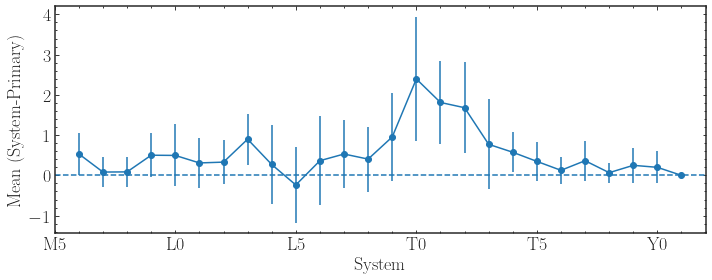

In [45]:
#fig.axes[-1].set_title('Composite', fontsize=18)
#plt.tight_layout()

fig, ax=plt.subplots(figsize=(10, 4))

ax.set_xlim([16, 42])

ax.set_xlabel('System', fontsize=18)
ax.set_ylabel(r' Mean (System-Primary) ', fontsize=18)
#plt.tight_layout()

#sns.kdeplot(df.prim, df.sys,  ax=ax1, shade=False)
c=ax.errorbar(acc.index, acc.sys_difference, yerr=acc.sys_difference_std)
ax.scatter(acc.index, acc.sys_difference)
ax.axhline(0.0, linestyle='--')
#ax1.set_xlabel('Primary', fontsize=18)
#ax1.set_ylabel('System', fontsize=18)

ax.minorticks_on()


ax.set_xticks([15, 20, 25, 30, 35, 40])
ax.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/binary_excess.pdf', bbox_inches='tight')

In [26]:
df.to_pickle(wisps.OUTPUT_FILES+'/binary_lookup_table.pkl')